<a href="https://colab.research.google.com/github/hansaniii/ML_Assignment/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.utils import resample

In [16]:
dataset_path = '/content/preprocessed_data.csv'  # Update the path as necessary
df = pd.read_csv(dataset_path)

In [17]:
print("Dataset loaded successfully")
print(df.head())

Dataset loaded successfully
   gender  age  hypertension  heart_disease  ever_married  work_type  \
0       1   67             0              1             1          1   
1       0   61             0              0             1          3   
2       1   80             0              1             1          1   
3       0   49             0              0             1          1   
4       0   79             1              0             1          3   

   residence_type  avg_glucose_level  bmi  smoking_status  stroke  
0               1                228   36               1       1  
1               2                202   28               2       1  
2               2                105   32               2       1  
3               1                171   34               3       1  
4               2                174   24               2       1  


In [18]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [19]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
df_majority = df[df['stroke'] == 0]
df_minority = df[df['stroke'] == 1]

In [22]:
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

In [23]:
df_balanced = pd.concat([df_majority_downsampled, df_minority])

In [24]:
X_balanced = df_balanced.drop('stroke', axis=1)
y_balanced = df_balanced['stroke']

In [25]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [26]:
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [27]:
y_pred_log_reg = log_reg_model.predict(X_test_balanced)
print("Logistic Regression Classification Report:")
print(classification_report(y_test_balanced, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        51
           1       0.70      0.76      0.73        49

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



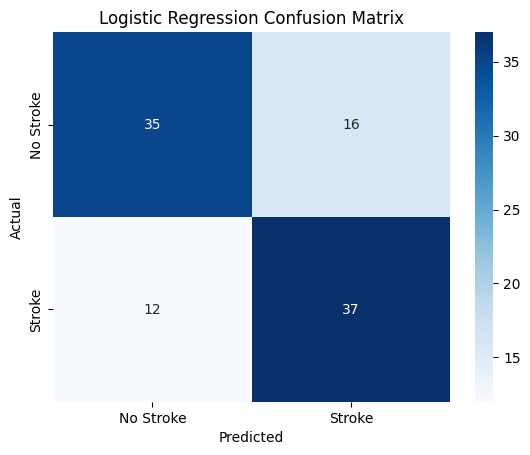

In [28]:
cm_log_reg = confusion_matrix(y_test_balanced, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

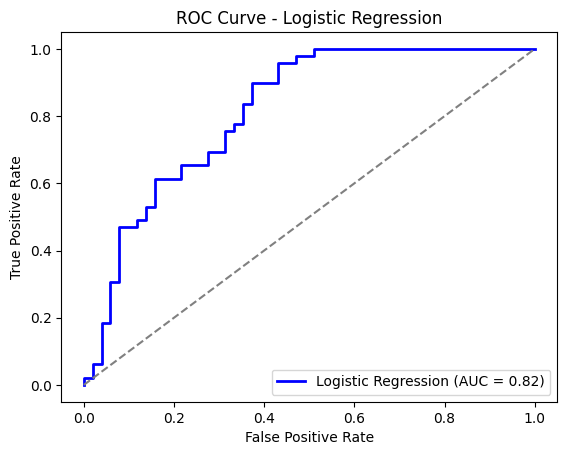

In [29]:
y_prob_log_reg = log_reg_model.predict_proba(X_test_balanced)[:, 1]  # Probabilities for ROC
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_balanced, y_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [30]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [31]:
y_pred_rf = rf_model.predict(X_test_balanced)
print("Random Forest Classification Report:")
print(classification_report(y_test_balanced, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76        51
           1       0.73      0.84      0.78        49

    accuracy                           0.77       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.78      0.77      0.77       100



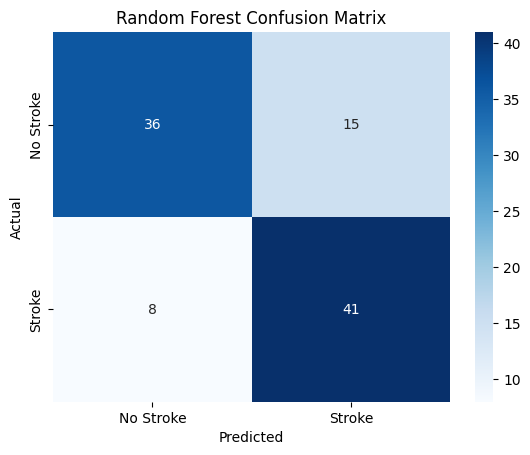

In [32]:
cm_rf = confusion_matrix(y_test_balanced, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

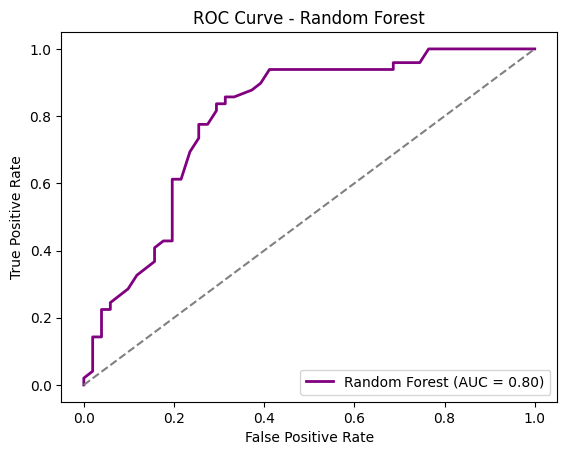

In [33]:
y_prob_rf = rf_model.predict_proba(X_test_balanced)[:, 1]  # Probabilities for ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test_balanced, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

In [34]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_balanced, y_train_balanced)

LinearRegression()

In [35]:
y_pred_linear_reg = linear_reg_model.predict(X_test_balanced)
y_pred_linear_reg = np.round(y_pred_linear_reg)

In [55]:
print("Linear Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_balanced, y_pred_linear_reg)}")
print(classification_report(y_test_balanced, y_pred_linear_reg))

Linear Regression Evaluation:
Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.72      0.67      0.69        51
           1       0.68      0.73      0.71        49

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



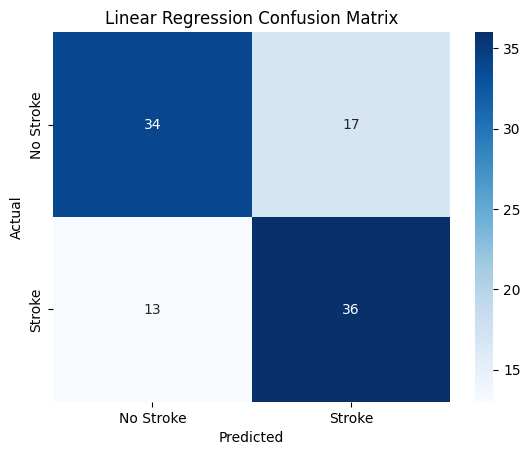

In [37]:
cm_linear_reg = confusion_matrix(y_test_balanced, y_pred_linear_reg)
sns.heatmap(cm_linear_reg, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title('Linear Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

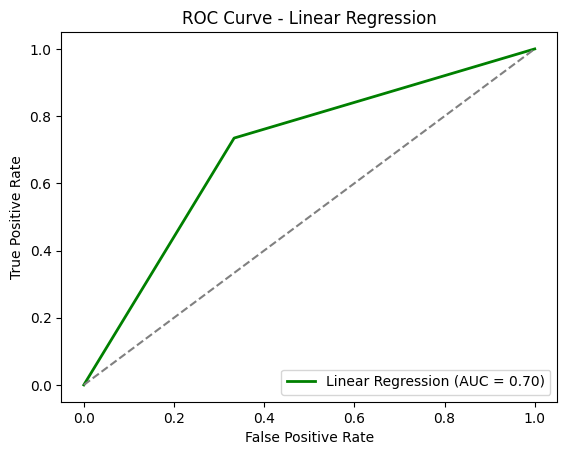

In [38]:
fpr_linear_reg, tpr_linear_reg, _ = roc_curve(y_test_balanced, y_pred_linear_reg)
roc_auc_linear_reg = auc(fpr_linear_reg, tpr_linear_reg)
plt.plot(fpr_linear_reg, tpr_linear_reg, color='green', lw=2, label='Linear Regression (AUC = %0.2f)' % roc_auc_linear_reg)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Linear Regression')
plt.legend(loc='lower right')
plt.show()

In [39]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier()

In [40]:
y_pred_knn = knn_model.predict(X_test_balanced)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test_balanced, y_pred_knn))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.59      0.66        51
           1       0.65      0.80      0.72        49

    accuracy                           0.69       100
   macro avg       0.70      0.69      0.69       100
weighted avg       0.70      0.69      0.69       100



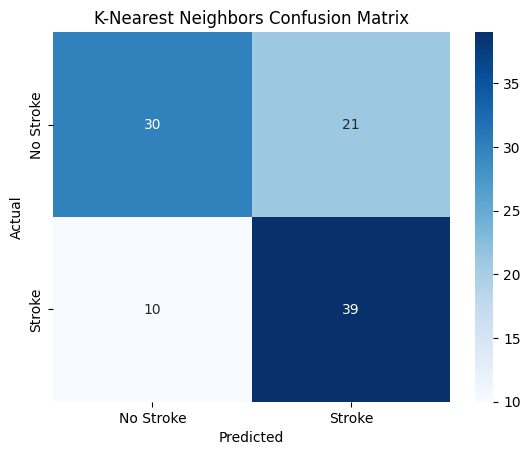

In [41]:
cm_knn = confusion_matrix(y_test_balanced, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

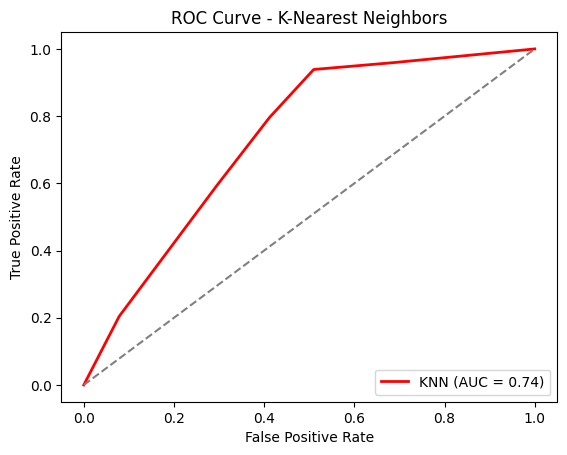

In [42]:
y_prob_knn = knn_model.predict_proba(X_test_balanced)[:, 1]  # Probabilities for ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test_balanced, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

In [43]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [44]:
y_pred_decision_tree = decision_tree_model.predict(X_test_balanced)
print("Decision Tree Classification Report:")
print(classification_report(y_test_balanced, y_pred_decision_tree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.51      0.59        51
           1       0.60      0.78      0.68        49

    accuracy                           0.64       100
   macro avg       0.65      0.64      0.63       100
weighted avg       0.65      0.64      0.63       100



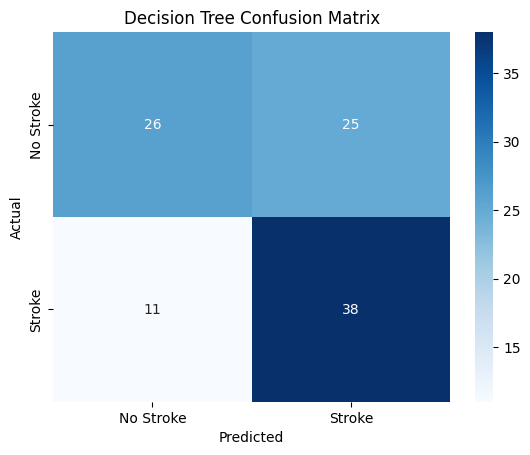

In [45]:
cm_decision_tree = confusion_matrix(y_test_balanced, y_pred_decision_tree)
sns.heatmap(cm_decision_tree, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

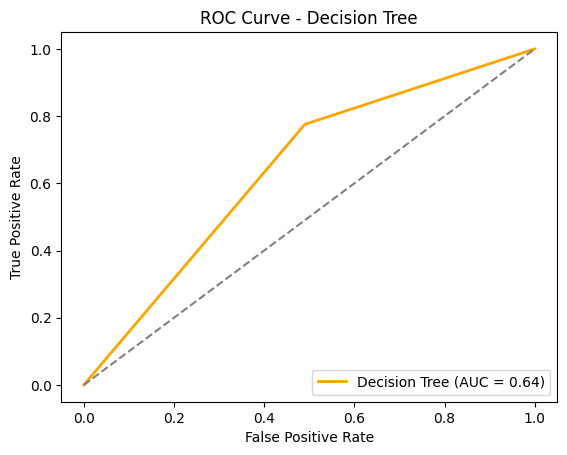

In [46]:
y_prob_decision_tree = decision_tree_model.predict_proba(X_test_balanced)[:, 1]  # Probabilities for ROC
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test_balanced, y_prob_decision_tree)
roc_auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)
plt.plot(fpr_decision_tree, tpr_decision_tree, color='orange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_decision_tree)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

In [47]:
svc_model = SVC(probability=True, random_state=42)
svc_model.fit(X_train_balanced, y_train_balanced)

SVC(probability=True, random_state=42)

In [48]:
y_pred_svc = svc_model.predict(X_test_balanced)
print("Support Vector Classifier Classification Report:")
print(classification_report(y_test_balanced, y_pred_svc))

Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        51
           1       0.69      0.73      0.71        49

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100



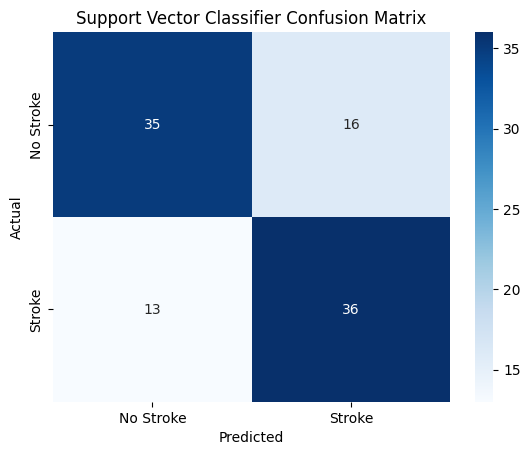

In [49]:
cm_svc = confusion_matrix(y_test_balanced, y_pred_svc)
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title('Support Vector Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

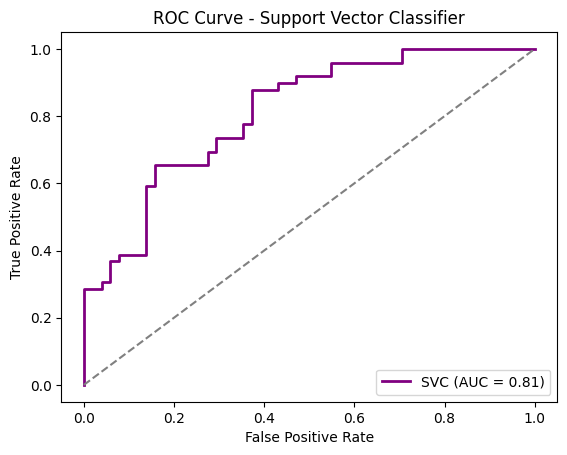

In [50]:
y_prob_svc = svc_model.predict_proba(X_test_balanced)[:, 1]  # Probabilities for ROC
fpr_svc, tpr_svc, _ = roc_curve(y_test_balanced, y_prob_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.plot(fpr_svc, tpr_svc, color='purple', lw=2, label='SVC (AUC = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Classifier')
plt.legend(loc='lower right')
plt.show()

In [51]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [52]:
y_pred_xgb = xgb_model.predict(X_test_balanced)
print("XGBoost Classification Report:")
print(classification_report(y_test_balanced, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73        51
           1       0.71      0.80      0.75        49

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



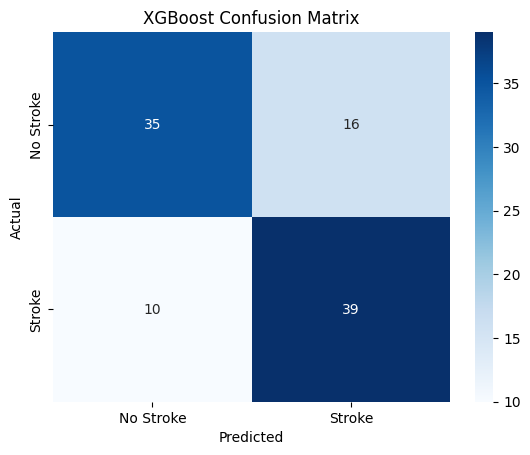

In [53]:
cm_xgb = confusion_matrix(y_test_balanced, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

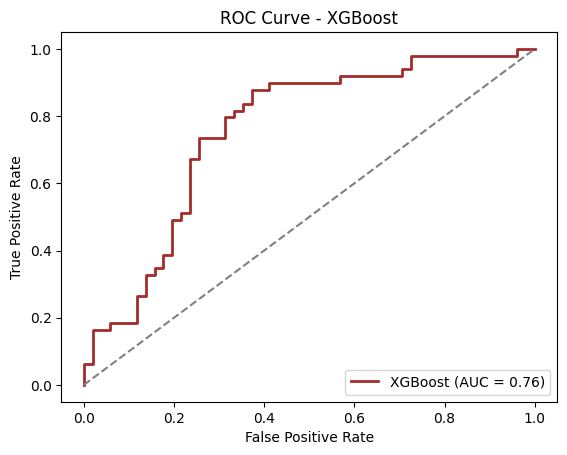

In [54]:
y_prob_xgb = xgb_model.predict_proba(X_test_balanced)[:, 1]  # Probabilities for ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_balanced, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='brown', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()